Скачиваем библиотеки

In [27]:
!pip install ipywidgets

In [28]:
!pip install lxml
!pip install requests
!pip install bs4
!pip install pandas
!pip install numpy
!pip install json
!pip install tqdm
!pip install folium
!pip install seaborn
!pip install matplotlib.pyplot
!pip install missingno

^C


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
import requests
import lxml
from bs4 import BeautifulSoup
import pandas as pd
import numpy as mp
import json
from tqdm.notebook import tqdm
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Парсинг данных

In [ ]:
url = f'https://dtp-stat.ru/opendata/'
req = requests.get(url)
result = req.content

soup = BeautifulSoup(result, 'lxml')

In [ ]:
urls_list= ['https://cms.dtp-stat.ru/media/opendata/altaiskii-krai.geojson',
 'https://cms.dtp-stat.ru/media/opendata/amurskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/arkhangelskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/astrakhanskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/belgorodskaia-oblast.geojson']

Проверяем сколько ссылок находиться в urls_list

In [ ]:
len(urls_list)

5

In [ ]:
def take_info_from_list (val_list):
    val_str = ', '
    if len(val_list) == 0:
       return 'Нету информации'
    else:
       return val_str.join(val_list)

Скачиваем данные и преобразуем их в csv формат

In [ ]:
total_data = pd.DataFrame()
for url in tqdm(urls_list[:]):
    data = pd.read_json(url)
    new_data = pd.DataFrame(list(data['features']))
    last_data = pd.DataFrame(list(new_data['properties']))
    total_data = pd.concat([total_data, last_data])

  0%|          | 0/5 [00:00<?, ?it/s]

# Предобработка данных и выделение значимых атрибутов

In [ ]:
total_data.head()

,id,tags,light,point,nearby,region,scheme,address,weather,category,datetime,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2869171,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 53.3912, 'long': 83.7879}",[Жилые дома индивидуальной застройки],Барнаул,830,None,[Ясно],Наезд на пешехода,2023-05-24 19:30:00,Легкий,"[{'year': 2015, 'brand': 'Прочие марки ТС', 'c...",0,"[{'role': 'Пешеход', 'gender': 'Мужской', 'vio...",1,Алтайский край,[Сухое],2,"[Все участники, Пешеходы, Мотоциклисты]"
1,2320091,"[Дорожно-транспортные происшествия, ДТП и пост...",Светлое время суток,"{'lat': 53.345833, 'long': 83.666389}","[Многоквартирные жилые дома, Внутридворовая те...",Барнаул,880,"г Барнаул, ул Сиреневая, 11",[Пасмурно],Иной вид ДТП,2015-09-16 13:00:00,Легкий,"[{'year': 2002, 'brand': 'TOYOTA', 'color': 'С...",0,[],1,Алтайский край,[Сухое],2,"[Все участники, Дети]"
2,2321011,"[Дорожно-транспортные происшествия, ДТП и пост...",Светлое время суток,"{'lat': 53.19706, 'long': 83.39688}","[Административные здания, Остановка общественн...",Барнаул,960,"г Барнаул, ул Попова, 165",[Ясно],Падение пассажира,2017-08-25 15:30:00,Легкий,"[{'year': 1981, 'brand': 'DAIMLER', 'color': '...",0,[],1,Алтайский край,[Сухое],3,"[Все участники, Дети]"
3,2576909,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 53.3764, 'long': 83.7142}","[Выезд с прилегающей территории, Административ...",Барнаул,130,"г Барнаул, ул Петра Сухова, 83 А",[Ясно],Столкновение,2021-05-29 19:40:00,Тяжёлый,"[{'year': 2001, 'brand': 'HONDA', 'color': 'Се...",0,[],1,Алтайский край,"[Сухое, Отсутствие, плохая различимость горизо...",3,"[Все участники, Мотоциклисты]"
4,2575209,[Дорожно-транспортные происшествия],Светлое время суток,"{'lat': 53.343071, 'long': 83.794366}","[Многоквартирные жилые дома, Жилые дома индиви...",Барнаул,500,"г Барнаул, ул Партизанская, 26",[Ясно],Столкновение,2021-05-25 16:40:00,Легкий,"[{'year': 2014, 'brand': 'NISSAN', 'color': 'С...",0,[],1,Алтайский край,"[Сухое, Отсутствие, плохая различимость горизо...",2,[Все участники]


Задаем функцию для извлечения значений из списка

In [ ]:
def take_from_list_dict(data, where_to_get, except_value):
    values_list = []
    for row in tqdm(range(data.shape[1])):
        try:
            values_list.append(list(where_to_get)[row].values())
        except:
            values_list.append(except_value)
    return values_list

Извлекаем

In [ ]:
total_data['tags'] = total_data['tags'].apply(take_info_from_list)
total_data['nearby'] = total_data['nearby'].apply(take_info_from_list)
total_data['weather'] = total_data['weather'].apply(take_info_from_list)
total_data['road_conditions'] = total_data['road_conditions'].apply(take_info_from_list)
total_data['participant_categories'] = total_data['participant_categories'].apply(take_info_from_list)
total_data.head()

,id,tags,light,point,nearby,region,scheme,address,weather,category,datetime,severity,vehicles,dead_count,participants,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3912, 'long': 83.7879}",Жилые дома индивидуальной застройки,Барнаул,830,None,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,"[{'year': 2015, 'brand': 'Прочие марки ТС', 'c...",0,"[{'role': 'Пешеход', 'gender': 'Мужской', 'vio...",1,Алтайский край,Сухое,2,"Все участники, Пешеходы, Мотоциклисты"
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.345833, 'long': 83.666389}","Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,880,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,"[{'year': 2002, 'brand': 'TOYOTA', 'color': 'С...",0,[],1,Алтайский край,Сухое,2,"Все участники, Дети"
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.19706, 'long': 83.39688}","Административные здания, Остановка общественно...",Барнаул,960,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,"[{'year': 1981, 'brand': 'DAIMLER', 'color': '...",0,[],1,Алтайский край,Сухое,3,"Все участники, Дети"
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3764, 'long': 83.7142}","Выезд с прилегающей территории, Административн...",Барнаул,130,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,"[{'year': 2001, 'brand': 'HONDA', 'color': 'Се...",0,[],1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты"
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.343071, 'long': 83.794366}","Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,500,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,"[{'year': 2014, 'brand': 'NISSAN', 'color': 'С...",0,[],1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники


Удаляем ненужные значения #в sheme не ясны какие это значения #В vehicles марка машины и другие данные нам не нужны #в participants основном пустые значения

In [ ]:
total_data_without_frills = total_data.drop(columns=['scheme', 'vehicles', 'participants'])
total_data_without_frills.head()

,id,tags,light,point,nearby,region,address,weather,category,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3912, 'long': 83.7879}",Жилые дома индивидуальной застройки,Барнаул,None,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Пешеходы, Мотоциклисты"
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.345833, 'long': 83.666389}","Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Дети"
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.19706, 'long': 83.39688}","Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,0,1,Алтайский край,Сухое,3,"Все участники, Дети"
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3764, 'long': 83.7142}","Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты"
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.343071, 'long': 83.794366}","Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники


Проверяем данные на то есть ли там пустые значения

In [ ]:
total_data_without_frills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68027 entries, 0 to 10866
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      68027 non-null  int64 
 1   tags                    68027 non-null  object
 2   light                   68027 non-null  object
 3   point                   68027 non-null  object
 4   nearby                  68027 non-null  object
 5   region                  68027 non-null  object
 6   address                 65140 non-null  object
 7   weather                 68027 non-null  object
 8   category                68027 non-null  object
 9   datetime                68027 non-null  object
 10  severity                68027 non-null  object
 11  dead_count              68027 non-null  int64 
 12  injured_count           68027 non-null  int64 
 13  parent_region           68027 non-null  object
 14  road_conditions         68027 non-null  object
 15  partici

Делаем переиндексацию 

In [ ]:
total_data_without_frills.reset_index(drop=True, inplace=True)

Заполняем пустые значения

In [ ]:
total_data_without_frills = total_data_without_frills.fillna('NO_INFORMATII')

Проверяем на наличии пустых значений

In [ ]:
total_data_without_frills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68027 entries, 0 to 68026
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      68027 non-null  int64 
 1   tags                    68027 non-null  object
 2   light                   68027 non-null  object
 3   point                   68027 non-null  object
 4   nearby                  68027 non-null  object
 5   region                  68027 non-null  object
 6   address                 68027 non-null  object
 7   weather                 68027 non-null  object
 8   category                68027 non-null  object
 9   datetime                68027 non-null  object
 10  severity                68027 non-null  object
 11  dead_count              68027 non-null  int64 
 12  injured_count           68027 non-null  int64 
 13  parent_region           68027 non-null  object
 14  road_conditions         68027 non-null  object
 15  pa

Извекаем данные из колонки Point

In [ ]:
import numpy as np
danger = []
except_value = [np.nan, np.nan]
for row in tqdm(range(total_data.shape[0])):
  try:
    danger.append(list(total_data['point'])[row].values())
  except:
    danger.append(except_value)

  0%|          | 0/68027 [00:00<?, ?it/s]

Смотрим какие значения находяться в переменной danger

In [ ]:
danger

[dict_values([53.3912, 83.7879]),
 dict_values([53.345833, 83.666389]),
 dict_values([53.19706, 83.39688]),
 dict_values([53.3764, 83.7142]),
 dict_values([53.343071, 83.794366]),
 dict_values([53.290476, 83.708739]),
 dict_values([53.3645, 83.7847]),
 dict_values([53.3292, 83.7846]),
 dict_values([53.34601, 83.652166]),
 dict_values([53.379297, 83.718234]),
 dict_values([53.367775, 83.74467]),
 dict_values([53.343391, 83.704684]),
 dict_values([53.348547, 83.776696]),
 dict_values([53.3397, 83.7856]),
 dict_values([53.379303, 83.724564]),
 dict_values([53.380602, 83.688548]),
 dict_values([53.335281, 83.777307]),
 dict_values([53.346824, 83.675759]),
 dict_values([53.3472, 83.7322]),
 dict_values([53.213904, 83.680941]),
 dict_values([53.3878, 83.7069]),
 dict_values([53.374196, 83.678366]),
 dict_values([53.3403, 83.7403]),
 dict_values([53.343948, 83.781084]),
 dict_values([53.339624, 83.669879]),
 dict_values([53.358978, 83.70315]),
 dict_values([53.350904, 83.722032]),
 dict_value

Задаем извлеченные данные в DataFrame и задаем их  переменную data_points

In [ ]:
data_points = pd.DataFrame(columns=list(total_data_without_frills['point'])[0].keys(), data=danger)

In [ ]:
data_points

,lat,long
0,53.391200,83.787900
1,53.345833,83.666389
2,53.197060,83.396880
3,53.376400,83.714200
4,53.343071,83.794366
...,...,...
68022,50.602901,38.660358
68023,50.614987,38.692945
68024,50.706406,38.655910
68025,50.603560,38.660960


смотрим совпадают ли значение двух dataframe 

In [ ]:
print(total_data_without_frills.shape)
print(data_points.shape)

(68027, 17)
(68027, 2)


Присоединяем данные

In [ ]:
total_data_ready = pd.concat([total_data_without_frills, data_points], axis=1)
total_data_ready.head()

,id,tags,light,point,nearby,region,address,weather,category,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,lat,long
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3912, 'long': 83.7879}",Жилые дома индивидуальной застройки,Барнаул,NO_INFORMATII,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Пешеходы, Мотоциклисты",53.391200,83.787900
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.345833, 'long': 83.666389}","Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Дети",53.345833,83.666389
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"{'lat': 53.19706, 'long': 83.39688}","Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,0,1,Алтайский край,Сухое,3,"Все участники, Дети",53.197060,83.396880
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.3764, 'long': 83.7142}","Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты",53.376400,83.714200
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"{'lat': 53.343071, 'long': 83.794366}","Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники,53.343071,83.794366


Удаляем теперь ненужную нам колонку point, из за того что мы уже присоединили от туда данные в колонки lat и long

In [ ]:
total_data_lat = total_data_ready.drop(columns=['point'])
total_data_lat.head()

,id,tags,light,nearby,region,address,weather,category,datetime,severity,dead_count,injured_count,parent_region,road_conditions,participants_count,participant_categories,lat,long
0,2869171,Дорожно-транспортные происшествия,Светлое время суток,Жилые дома индивидуальной застройки,Барнаул,NO_INFORMATII,Ясно,Наезд на пешехода,2023-05-24 19:30:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Пешеходы, Мотоциклисты",53.391200,83.787900
1,2320091,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Многоквартирные жилые дома, Внутридворовая тер...",Барнаул,"г Барнаул, ул Сиреневая, 11",Пасмурно,Иной вид ДТП,2015-09-16 13:00:00,Легкий,0,1,Алтайский край,Сухое,2,"Все участники, Дети",53.345833,83.666389
2,2321011,"Дорожно-транспортные происшествия, ДТП и постр...",Светлое время суток,"Административные здания, Остановка общественно...",Барнаул,"г Барнаул, ул Попова, 165",Ясно,Падение пассажира,2017-08-25 15:30:00,Легкий,0,1,Алтайский край,Сухое,3,"Все участники, Дети",53.197060,83.396880
3,2576909,Дорожно-транспортные происшествия,Светлое время суток,"Выезд с прилегающей территории, Административн...",Барнаул,"г Барнаул, ул Петра Сухова, 83 А",Ясно,Столкновение,2021-05-29 19:40:00,Тяжёлый,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",3,"Все участники, Мотоциклисты",53.376400,83.714200
4,2575209,Дорожно-транспортные происшествия,Светлое время суток,"Многоквартирные жилые дома, Жилые дома индивид...",Барнаул,"г Барнаул, ул Партизанская, 26",Ясно,Столкновение,2021-05-25 16:40:00,Легкий,0,1,Алтайский край,"Сухое, Отсутствие, плохая различимость горизон...",2,Все участники,53.343071,83.794366


Поиск одинаковых значений

In [ ]:
total_data_lat['id'].value_counts(ascending=False).head(3)

id
2869171    1
2218216    1
2223616    1
Name: count, dtype: int64

смотрим повторна на наличии пустых значений

In [26]:
total_data_lat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68027 entries, 0 to 68026
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      68027 non-null  int64  
 1   tags                    68027 non-null  object 
 2   light                   68027 non-null  object 
 3   nearby                  68027 non-null  object 
 4   region                  68027 non-null  object 
 5   address                 68027 non-null  object 
 6   weather                 68027 non-null  object 
 7   category                68027 non-null  object 
 8   datetime                68027 non-null  object 
 9   severity                68027 non-null  object 
 10  dead_count              68027 non-null  int64  
 11  injured_count           68027 non-null  int64  
 12  parent_region           68027 non-null  object 
 13  road_conditions         68027 non-null  object 
 14  participants_count      68027 non-null

визуализируем данные о пропусках

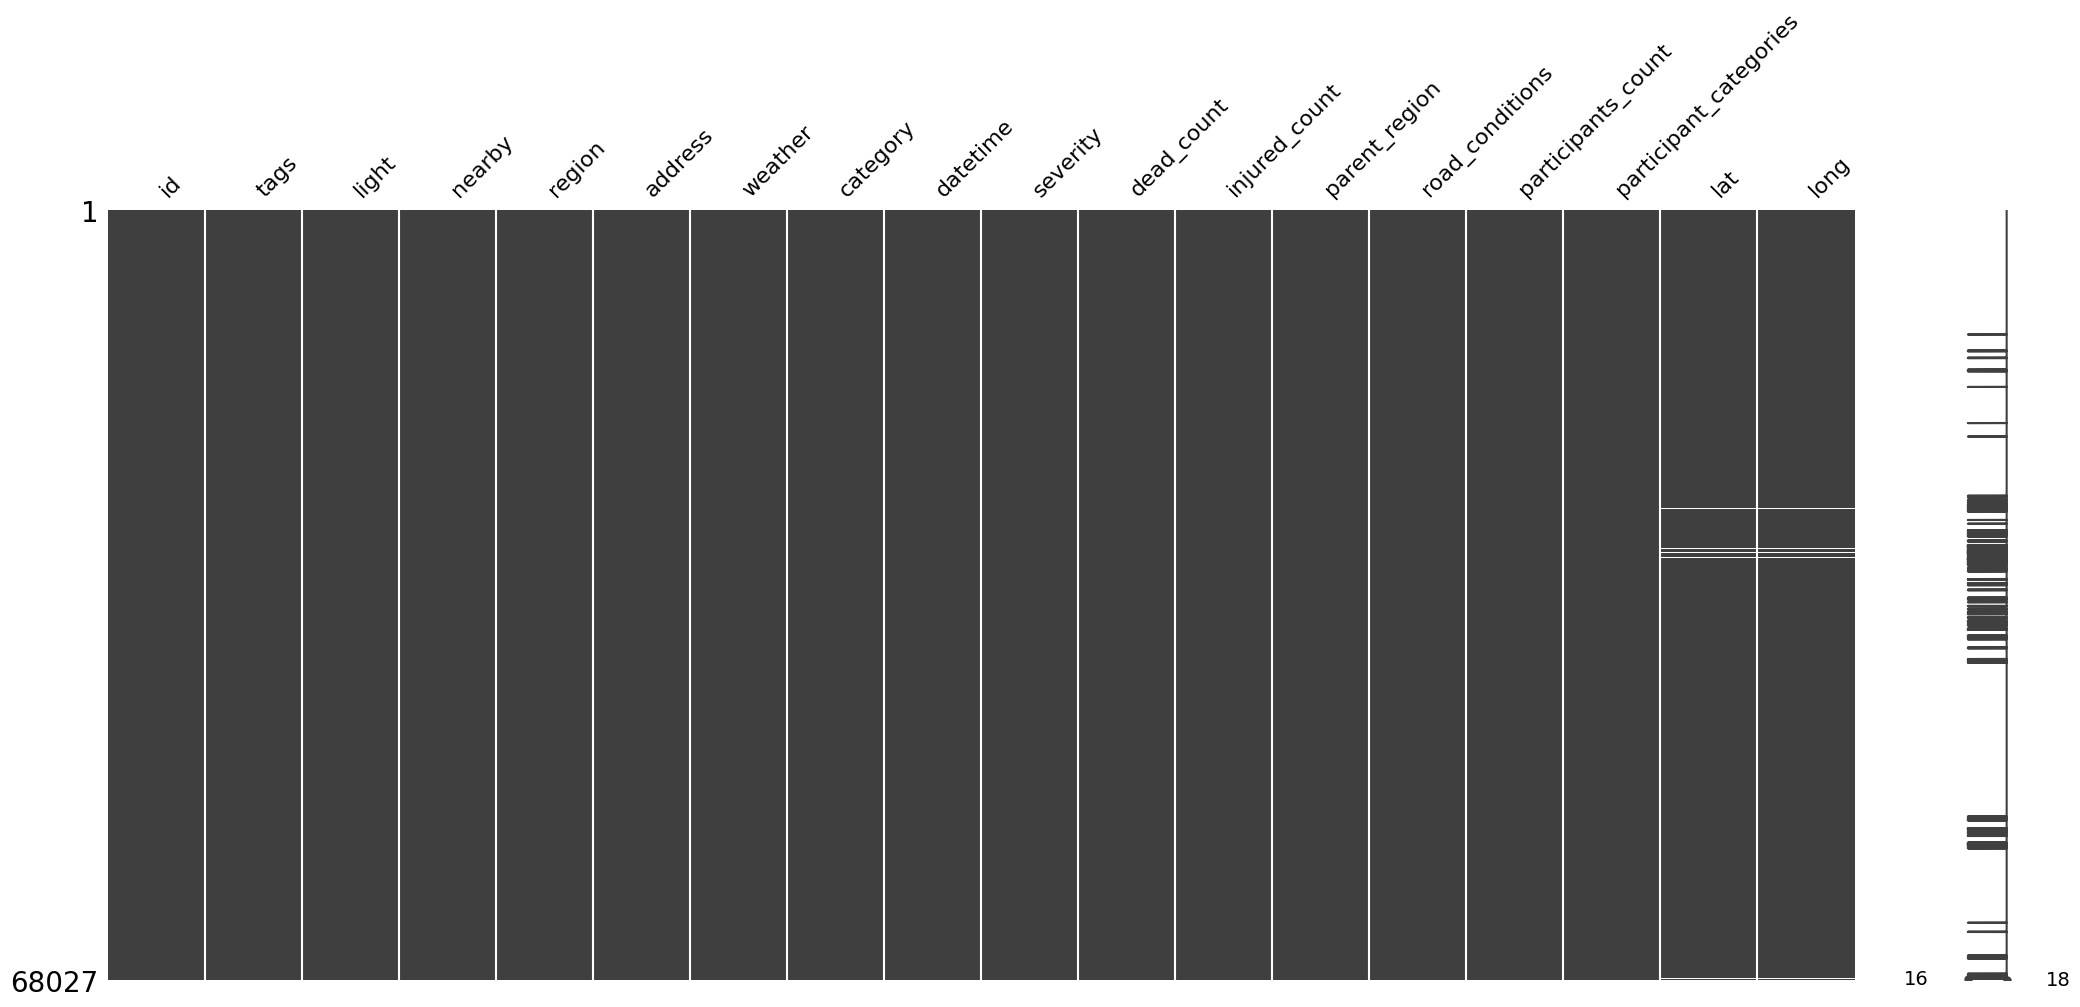

In [ ]:
msno.matrix(total_data_lat);

# Виузализация данных

Составим сводную таблицу, которая покажет численную разницу в количестве раненных к тяжести ДТП, уровню освещения и погоде

In [ ]:
table = pd.pivot_table(total_data_lat, values='dead_count', index=['severity','light'],
                       columns=['weather'], aggfunc="sum")

table = table.fillna('0.0')
table

weather                                                  Дождь  \
severity    light                                                
Легкий      В темное время суток, освещение включено       0.0   
            В темное время суток, освещение не включено    0.0   
            В темное время суток, освещение отсутствует    0.0   
            Не установлено                                 0.0   
            Светлое время суток                            0.0   
            Сумерки                                        0.0   
С погибшими В темное время суток, освещение включено      82.0   
            В темное время суток, освещение не включено   12.0   
            В темное время суток, освещение отсутствует   99.0   
            Не установлено                                 0.0   
            Светлое время суток                          156.0   
            Сумерки                                        9.0   
Тяжёлый     В темное время суток, освещение включено       0.0   
            В темное время суток, освещение не включено    0.0   
            В темное время суток, освещение отсутствует    0.0   
            Не установлено                                 0.0   
            Светлое время суток                            0.0   
            Сумерки                                        0.0   

weather                                                 Дождь, Снегопад  \
severity    light                                                         
Легкий      В темное время суток, освещение включено                0.0   
            В темное время суток, освещение не включено             0.0   
            В темное время суток, освещение отсутствует             0.0   
            Не установлено                                          0.0   
            Светлое время суток                                     0.0   
            Сумерки                                                 0.0   
С погибшими В темное время суток, освещение включено                1.0   
            В темное время суток, освещение не включено             0.0   
            В темное время суток, освещение отсутствует             1.0   
            Не установлено                                          0.0   
            Светлое время суток                                     0.0   
            Сумерки                                                 0.0   
Тяжёлый     В темное время суток, освещение включено                0.0   
            В темное время суток, освещение не включено             0.0   
            В темное время суток, освещение отсутствует             0.0   
            Не установлено                                          0.0   
            Светлое время суток                                     0.0   
            Сумерки                                                 0.0   

weather                                                 Дождь, Температура ниже -30С  \
severity    light                                                                      
Легкий      В темное время суток, освещение включено                             0.0   
            В темное время суток, освещение не включено                          0.0   
            В темное время суток, освещение отсутствует                          0.0   
            Не установлено                                                       0.0   
            Светлое время суток                                                  0.0   
            Сумерки                                                              0.0   
С погибшими В темное время суток, освещение включено                             0.0   
            В темное время суток, освещение не включено                          0.0   
            В темное время суток, освещение отсутствует                          0.0   
            Не установлено                                                       0.0   
            Светлое время суток                                                  0.0   
            Сумерки               

Сводная таблица о зависимости тяжести ДТП от катергории происшествия

In [ ]:
category_prose = pd.pivot_table(total_data_lat, values='injured_count', index='severity'
                                    , columns='category'
                                    , aggfunc='sum')
category_prose = category_prose.fillna(0.0)
category_prose

category,"Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении.",Иной вид ДТП,Наезд на велосипедиста,Наезд на внезапно возникшее препятствие,Наезд на гужевой транспорт,Наезд на животное,"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность","Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы","Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",Наезд на пешехода,Наезд на препятствие,Наезд на стоящее ТС,Опрокидывание,Отбрасывание предмета,Падение груза,Падение пассажира,Столкновение,Съезд с дороги
severity,,,,,,,,,,,,,,,,,,
Легкий,2.0,222.0,1467.0,5.0,10.0,115.0,18.0,33.0,51.0,12500.0,2383.0,1372.0,3087.0,48.0,12.0,2105.0,25406.0,3160.0
С погибшими,0.0,7.0,17.0,0.0,1.0,13.0,0.0,0.0,1.0,170.0,275.0,163.0,526.0,0.0,0.0,0.0,2712.0,329.0
Тяжёлый,0.0,113.0,719.0,1.0,22.0,75.0,2.0,0.0,3.0,7239.0,2244.0,772.0,3113.0,13.0,0.0,354.0,13284.0,2812.0


Зависимость колво ранненых к тяжести ДТП

<Axes: xlabel='severity', ylabel='injured_count'>

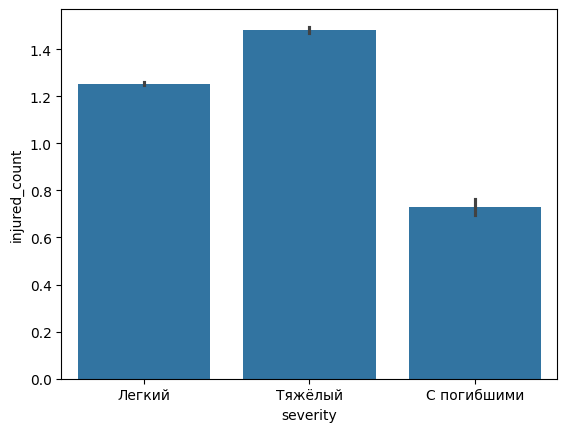

In [ ]:
sns.barplot(x='severity', y='injured_count', data=total_data_lat)

# Описание структуры набора данных


"id": идентификатор

"tags": показатели с официального сайта ГИБДД

"light": время суток

"nearby": ближайшие объекты

"region": город/район

"address": адрес

"weather": погода

"category": тип ДТП

"datetime": дата и время

"severity":тяжесть ДТП/вред здоровью

"dead_count": кол-во погибших в ДТП

"injured_count": кол-во раненых в ДТП

"parent_region": регион

"road_conditions": состояние дорожного покрытия

"participants_count": кол-во участников ДТП

"participant_categories": категории участников

"lat": Широта

"long": Долгота

# Выводы

В результате этой сессии мы узнали численную разницу в количестве раненных к тяжести ДТП, уровню освещения и погоде и зависимости тяжести ДТП от катергории происшествия